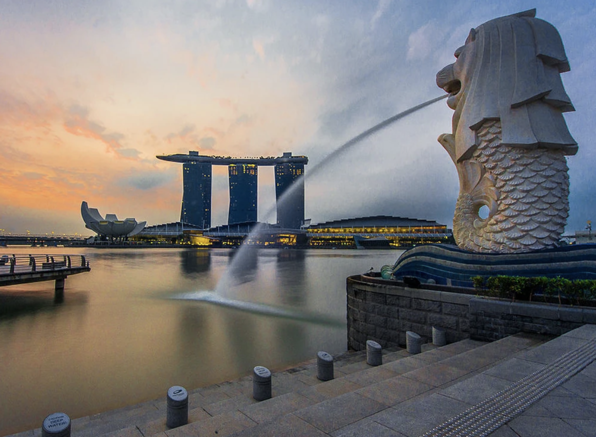

In [1]:
import os

import requests
from PIL import Image

url = 'https://storage.googleapis.com/sfr-vision-language-research/LAVIS/assets/merlion.png' 
image = Image.open(requests.get(url, stream=True).raw).convert('RGB')   
display(image.resize((596, 437)))

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
# by default `from_pretrained` loads the weights in float32
# we load in float16 instead to save memory
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16) 
     


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((

In [4]:
inputs = processor(image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

singapore merlion fountain


In [5]:
prompt = "this is a picture of"

inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a statue in front of a water fountain


In [6]:
processor

Blip2Processor:
- image_processor: BlipImageProcessor {
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "BlipImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "processor_class": "Blip2Processor",
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

- tokenizer: GPT2TokenizerFast(name_or_path='Salesforce/blip2-opt-2.7b', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad

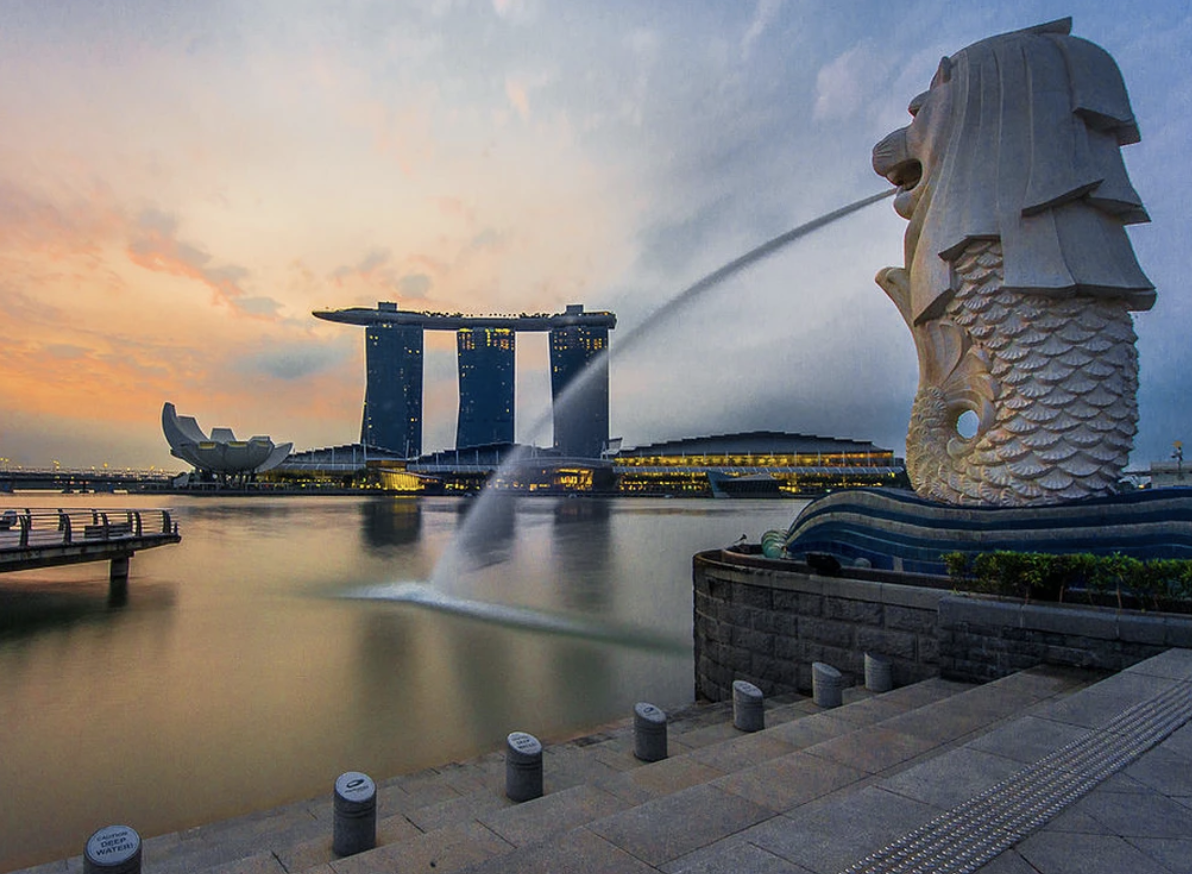

In [7]:
image

In [8]:
type(image)

PIL.Image.Image

In [9]:
import glob
import os

In [15]:
path = "Code/datasets/imagenet_test/val"
dest = "Code/datasets/imagenet_test/captions"
os.makedirs(dest, exist_ok=True)
folders = sorted(os.listdir(path))

In [17]:
folders

['n01440764',
 'n01443537',
 'n01484850',
 'n01491361',
 'n01494475',
 'n01496331',
 'n01498041',
 'n01514668',
 'n01514859',
 'n01518878',
 'n01530575',
 'n01531178',
 'n01532829',
 'n01534433',
 'n01537544',
 'n01558993',
 'n01560419',
 'n01580077',
 'n01582220',
 'n01592084',
 'n01601694',
 'n01608432',
 'n01614925',
 'n01616318',
 'n01622779',
 'n01629819',
 'n01630670',
 'n01631663',
 'n01632458',
 'n01632777',
 'n01641577',
 'n01644373',
 'n01644900',
 'n01664065',
 'n01665541',
 'n01667114',
 'n01667778',
 'n01669191',
 'n01675722',
 'n01677366',
 'n01682714',
 'n01685808',
 'n01687978',
 'n01688243',
 'n01689811',
 'n01692333',
 'n01693334',
 'n01694178',
 'n01695060',
 'n01697457',
 'n01698640',
 'n01704323',
 'n01728572',
 'n01728920',
 'n01729322',
 'n01729977',
 'n01734418',
 'n01735189',
 'n01737021',
 'n01739381',
 'n01740131',
 'n01742172',
 'n01744401',
 'n01748264',
 'n01749939',
 'n01751748',
 'n01753488',
 'n01755581',
 'n01756291',
 'n01768244',
 'n01770081',
 'n017

In [ ]:
for folder in folders:
    folder_path = os.path.join(path, folder)
    dest_folder_path = os.path.join(dest, folder)
    os.makedirs(dest_folder_path, exist_ok=True)
    image_names = os.listdir(folder_path)
    for image_name in image_names:
        image_path = os.path.join(folder_path, image_name)
        dest_caption_path = os.path.join(dest_folder_path, f'{image_name.split(".")[0]}.txt')
        image = Image.open(image_path).convert('RGB')   
        display(image.resize((596, 437)))

        inputs = processor(image, return_tensors="pt").to(device, torch.float16)

        generated_ids = model.generate(**inputs, max_new_tokens=20)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        print(generated_text)
        
        
        prompt = "this is a picture of"

        inputs = processor(image, text=prompt, return_tensors="pt").to(device, torch.float16)

        generated_ids = model.generate(**inputs, max_new_tokens=20)
        generated_text_ = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
        print(f"{prompt} {generated_text_}")
        
        with open(dest_caption_path, "w") as f:
            f.write(f"{prompt} {generated_text}")
            f.write("\n")
            f.write(generated_text)
            f.write("\n")
            f.write(f"{prompt} {generated_text_}")
        